In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp
import ezc3d

In [26]:
force_plate = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_hitting/data/full_sig/force_plate.csv")
poi_metrics = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_hitting/data/poi/poi_metrics.csv")
hittrax = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_hitting/data/poi/hittrax.csv")
meta = pd.read_csv("/Volumes/Emilio's Ex/code/Data/OpenBiomechanicsProject/openbiomechanics/baseball_hitting/data/metadata.csv") 


### First I am going to calculate smash factor

In [29]:

#get columns from hittrax_data into poi_metrics_data based on 'session_swing'
merged_ht_poi = poi_metrics.merge(hittrax[['session_swing', 'pitch']], on='session_swing')

#smash factor calculation
merged_ht_poi['smash_factor'] = 1 + ((merged_ht_poi['exit_velo_mph_x'] - merged_ht_poi['bat_speed_mph_contact_x']) /
                                   (merged_ht_poi['pitch'] + merged_ht_poi['bat_speed_mph_contact_x']))

merged_ht_poi.head()

,session_swing,session,exit_velo_mph_x,blast_bat_speed_mph_x,bat_speed_mph_contact_x,sweet_spot_velo_mph_contact_x,sweet_spot_velo_mph_contact_y,sweet_spot_velo_mph_contact_z,bat_torso_angle_connection_x,attack_angle_contact_x,bat_speed_mph_max_x,bat_speed_xy_max_x,bat_torso_angle_ds_x,bat_torso_angle_ds_y,bat_torso_angle_ds_z,hand_speed_blast_bat_mph_max_x,hand_speed_mag_max_x,pelvis_angle_fm_x,pelvis_angle_fm_y,pelvis_angle_fm_z,pelvis_angle_fp_x,pelvis_angle_fp_y,pelvis_angle_fp_z,pelvis_angle_hs_x,pelvis_angle_hs_y,pelvis_angle_hs_z,torso_angle_fm_x,torso_angle_fm_y,torso_angle_fm_z,torso_angle_fp_x,torso_angle_fp_y,torso_angle_fp_z,torso_angle_hs_x,torso_angle_hs_y,torso_angle_hs_z,upper_arm_speed_mag_max_x,x_factor_fm_x,x_factor_fm_y,x_factor_fm_z,x_factor_fp_x,x_factor_fp_y,x_factor_fp_z,bat_max_x,bat_min_x,hand_speed_mag_fm_x,hand_speed_mag_fp_x,hand_speed_mag_maxhss_x,hand_speed_mag_seq_max_x,hand_speed_mag_stride_max_velo_x,hand_speed_mag_swing_max_velo_x,lead_knee_launchpos_x,lead_knee_stride_max_x,lead_wrist_fm_x,lead_wrist_swing_max_x,pelvis_angular_velocity_fm_x,pelvis_angular_velocity_fp_x,pelvis_angular_velocity_maxhss_x,pelvis_angular_velocity_seq_max_x,pelvis_angular_velocity_stride_max_x,pelvis_angular_velocity_swing_max_x,pelvis_fm_x,pelvis_fm_y,pelvis_fm_z,pelvis_launchpos_x,pelvis_launchpos_y,pelvis_launchpos_z,pelvis_loadedpos_x,pelvis_load_max_x,pelvis_stride_max_x,pelvis_stride_max_y,pelvis_stride_max_z,pelvis_swing_max_x,pelvis_swing_max_y,pelvis_swing_max_z,rear_elbow_fm_x,rear_elbow_fm_z,rear_elbow_launchpos_x,rear_elbow_stride_max_x,rear_elbow_stride_max_z,rear_elbow_swing_max_x,rear_elbow_swing_max_z,rear_hip_launchpos_x,rear_hip_stride_max_x,rear_hip_stride_max_y,rear_hip_stride_max_z,rear_shoulder_launchpos_x,rear_shoulder_stride_max_x,rear_shoulder_stride_max_y,rear_shoulder_stride_max_z,torso_angular_velocity_fm_x,torso_angular_velocity_fp_x,torso_angular_velocity_maxhss_x,torso_angular_velocity_stride_max_x,torso_angular_velocity_seq_max_x,torso_angular_velocity_swing_max_x,torso_fm_x,torso_fm_y,torso_fm_z,torso_launchpos_x,torso_launchpos_y,torso_launchpos_z,torso_loadedpos_x,torso_load_max_x,torso_pelvis_fm_x,torso_pelvis_launchpos_x,torso_pelvis_loadedpos_x,torso_pelvis_load_max_x,torso_pelvis_stride_max_x,torso_pelvis_stride_max_y,torso_pelvis_stride_max_z,torso_pelvis_swing_max_x,torso_stride_max_x,torso_stride_max_y,torso_stride_max_z,torso_swing_max_x,torso_swing_max_y,torso_swing_max_z,upper_arm_speed_mag_fm_x,upper_arm_speed_mag_fp_x,upper_arm_speed_mag_maxhss_x,upper_arm_speed_mag_seq_max_x,upper_arm_speed_mag_stride_max_velo_x,upper_arm_speed_mag_swing_max_velo_x,x_factor_hs_x,x_factor_hs_y,x_factor_hs_z,max_cog_velo_x,pitch,smash_factor
0,103_1,103,97.2,66.8,67.9426,67.5411,1.1177,6.4040,121.0109,5.7984,69.2154,2529.2776,-121.3557,121.0109,101.5540,23.0841,1527.4279,26.7272,3.9890,-20.0787,28.8512,4.1585,13.4340,27.0634,4.7819,-21.0498,27.9432,-15.0864,-13.0060,21.8904,-0.0221,-5.8966,28.8937,-15.0236,-12.1180,987.9657,-0.0808,-20.1757,-2.4765,6.7230,5.7071,-18.9520,597.5685,32.7952,100.3058,529.3574,848.9559,1527.4279,529.3574,1527.4279,31.6650,100.3434,23.0732,-12.3100,31.8693,580.7448,733.0911,733.6451,580.7448,733.6451,-26.7272,3.9890,-110.0787,-28.8512,4.1585,-76.5660,-100.4105,-98.1193,-28.8512,10.6588,-111.1967,-1.8499,10.6588,11.3636,132.2291,67.3961,121.7515,143.6237,77.7509,143.6237,83.4073,54.4718,57.1879,-4.2861,37.7659,51.7001,11.0415,89.5564,11.7063,-20.5107,453.0682,748.4769,453.0682,775.7749,775.7749,-27.9432,-15.0864,-103.0060,-21.8904,-0.0221,-95.8966,-97.7734,-97.5618,-2.4765,-18.9520,-4.3548,-4.9252,-3.1422,-25.0935,-18.9520,-20.5898,-29.9237,-15.0887,-104.0084,19.9394,25.5588,6.2796,77.2077,281.0329,449.7435,987.9657,290.3699,987.9657,-0.7814,-21.6590,-1.2444,1.2410,57.8,1.232677
1,103_2,103,88.8,65.0,66.0435,65.8729,-3.0676,0.6329,124.9791,0.2952,66.0435,2446.7554,-119.2728,124.9791,103.9509,21.8076,1534.3438,26.9757,5.0393,-20.8640,28.1628,5.7143,12.9408,26.

In [90]:
#merge the meta and forceplate dfs to get hitter side so we can normalize direction of y force later
merged_fp_meta = force_plate.merge(meta[['session_swing', 'hitter_side']], on='session_swing')
#merged_fp_meta.head()

#add smash factor to the dataframe
merged_fp_meta_with_smash = merged_fp_meta.merge(merged_ht_poi[['session_swing', 'exit_velo_mph_x','bat_speed_mph_contact_x','smash_factor']], on='session_swing')
#merged_fp_meta_with_smash.head()


#creae a copy of the df 
merged_fp_meta_c = merged_fp_meta_with_smash.copy()
#normalize force direction to match the global lab reference point. =y points to the RH batters box
merged_fp_meta_c['lead_force_y'] = merged_fp_meta_c.apply(lambda row: -row['lead_force_y'] if row['hitter_side'] == 'R' else row['lead_force_y'], axis=1)
merged_fp_meta_c['rear_force_y'] = merged_fp_meta_c.apply(lambda row: -row['rear_force_y'] if row['hitter_side'] == 'R' else row['rear_force_y'], axis=1)



In [77]:
merged_fp_meta_c.head()

,session_swing,time,rear_force_x,rear_force_y,rear_force_z,lead_force_x,lead_force_y,lead_force_z,fp_10_time,fp_100_time,contact_time,hitter_side,exit_velo_mph_x,bat_speed_mph_contact_x,smash_factor
0,103_1,0.0000,1.1806,-9.7676,1038.6766,78.7946,-3.5307,-3.8334,1.5722,1.5944,1.7528,R,97.2,67.9426,1.232677
1,103_1,0.0009,1.1687,-9.7332,1038.1773,78.7929,-3.5388,-3.8388,1.5722,1.5944,1.7528,R,97.2,67.9426,1.232677
2,103_1,0.0019,1.1530,-9.6955,1037.6669,78.7896,-3.5475,-3.8424,1.5722,1.5944,1.7528,R,97.2,67.9426,1.232677
3,103_1,0.0028,1.1325,-9.6550,1037.1527,78.7843,-3.5565,-3.8439,1.5722,1.5944,1.7528,R,97.2,67.9426,1.232677
4,103_1,0.0037,1.1062,-9.6124,1036.6422,78.7768,-3.5657,-3.8430,1.5722,1.5944,1.7528,R,97.2,67.9426,1.232677


In [78]:
def view_best_smash_factors_per_session(dataframe,n):
    best_smash_factors = dataframe.groupby('session_swing')['smash_factor'].max().reset_index()
    
    best_smash_factors_sorted = best_smash_factors.sort_values(by='smash_factor', ascending=False)
    
    print(best_smash_factors_sorted.head(n))

view_best_smash_factors_per_session(merged_fp_meta_c,10)


    session_swing  smash_factor
96          190_4      1.512828
187          25_4      1.454611
12          123_9      1.449470
78           17_4      1.433167
89          185_3      1.422927
74          179_7      1.417258
267         313_2      1.415609
148         219_2      1.415414
146         215_5      1.414197
116         200_1      1.405162


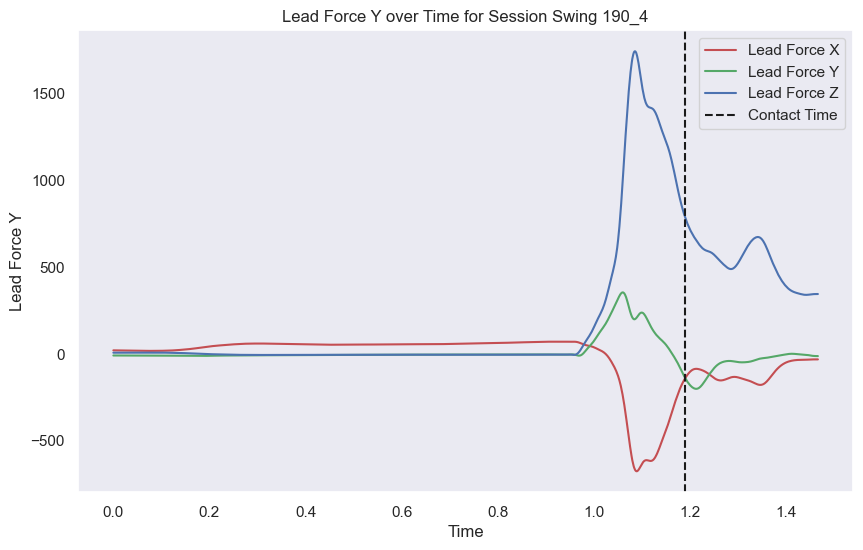

In [64]:
def plot_lead_force_y(session_swing_id):
    sns.set(style='dark')
    session_data = merged_fp_meta_c[merged_fp_meta_c['session_swing'] == session_swing_id]
    ev
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(session_data['time'], session_data['lead_force_x'], color='r',label='Lead Force X')
    plt.plot(session_data['time'], session_data['lead_force_y'], color='g', label='Lead Force Y')
    plt.plot(session_data['time'], session_data['lead_force_z'], color='b', label='Lead Force Z')
    
    contact_time = session_data['contact_time'].iloc[0]
    plt.axvline(x=contact_time, color='k', linestyle='--', label='Contact Time')
    

    plt.title(f'Lead Force Y over Time for Session Swing {session_swing_id}')
    plt.xlabel('Time')
    plt.ylabel('Lead Force Y')
    plt.legend()
    plt.grid(False)
    plt.show()

# Example usage
plot_lead_force_y("190_4")


In [98]:
#get top 6 smash factors
top_6_smash = merged_fp_meta_c.groupby('session_swing')['smash_factor'].max().nlargest(6).index.tolist()

#get top 6 evs
top_6_ev = merged_fp_meta_c.groupby('session_swing')['exit_velo_mph_x'].max().nlargest(6).index.tolist()

#get top 6 baat speeds
top_6_bs = merged_fp_meta_c.groupby('session_swing')['bat_speed_mph_contact_x'].max().nlargest(6).index.tolist()

### Plotting lead leg forces for top 6 smash factor swings

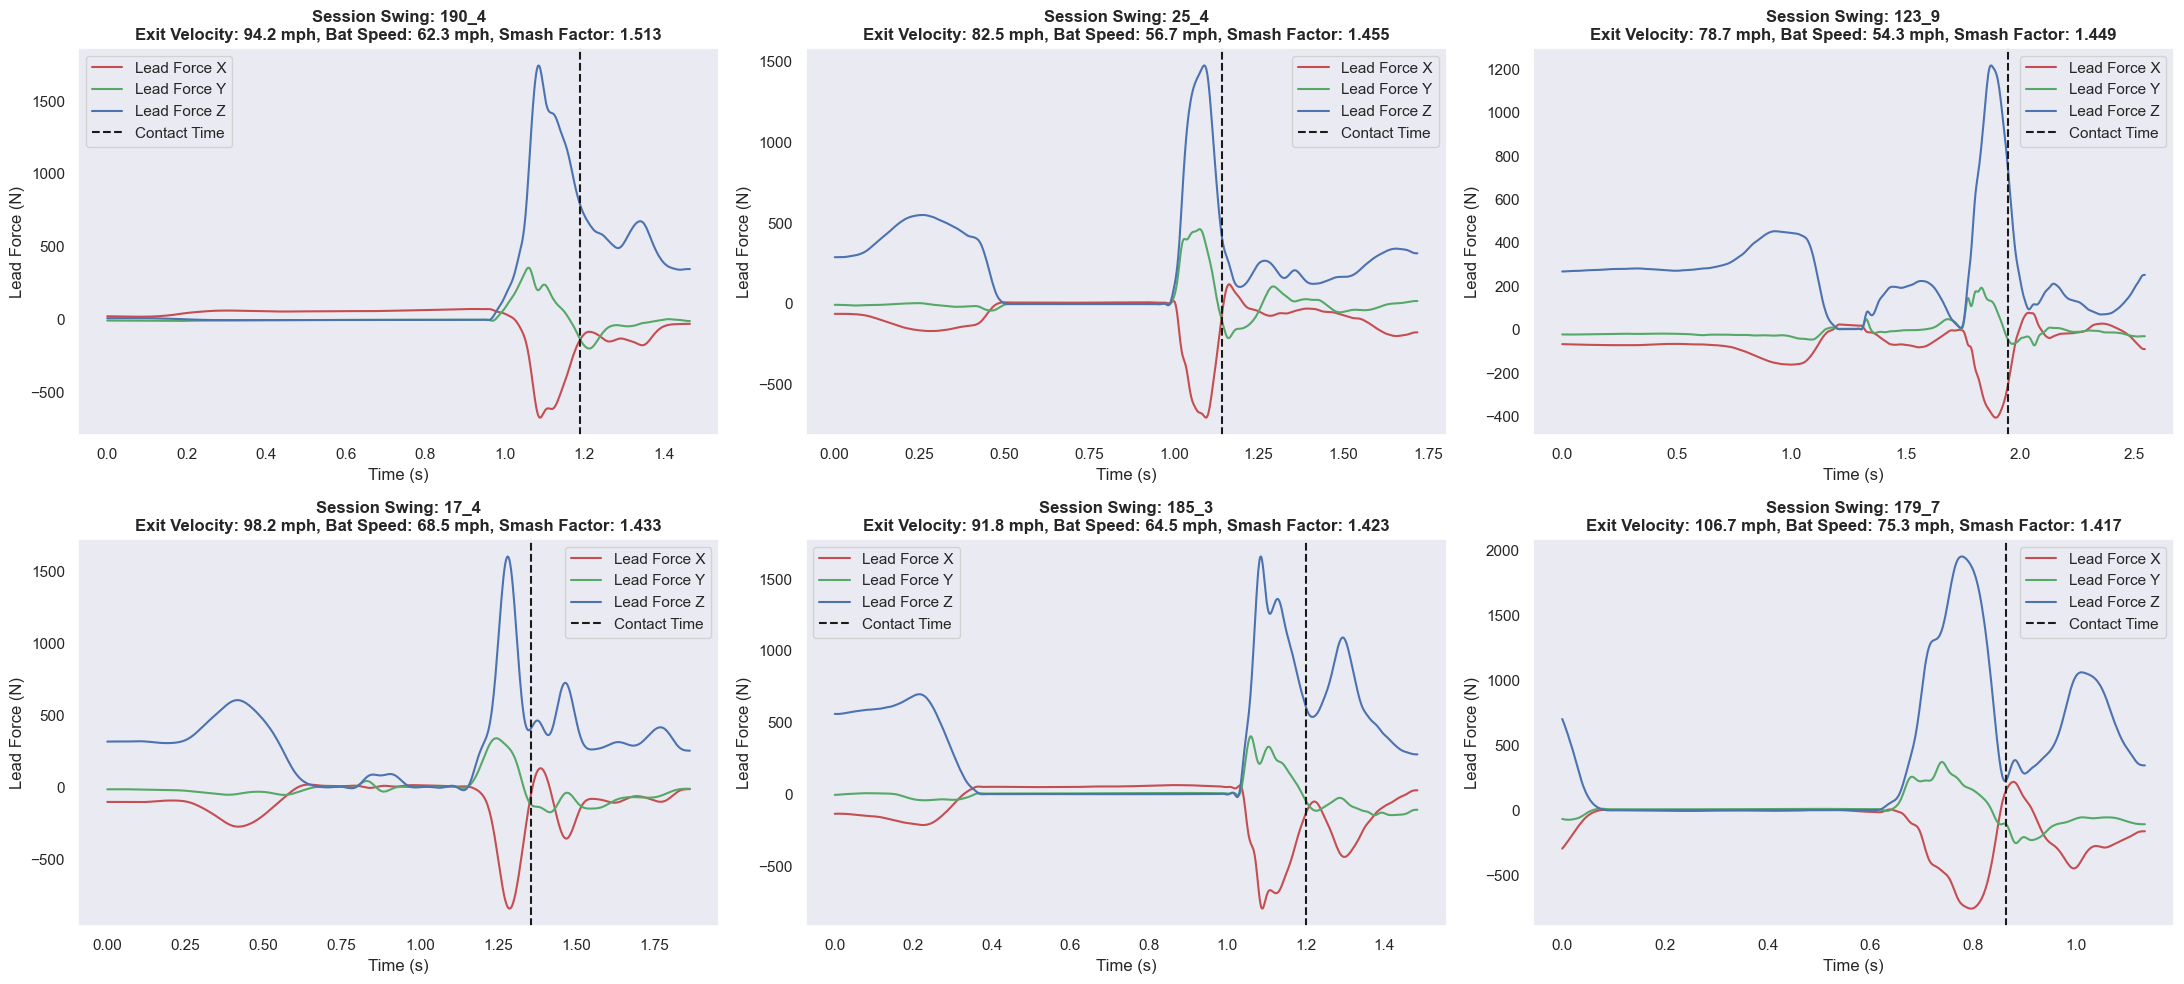

In [97]:

def plot_top_6_lead_forces(merged_fp_meta, top_6_smash):
    sns.set(style='darkgrid')
    
    fig, axs = plt.subplots(2, 3, figsize=(22, 10))
    
    axs = axs.flatten()
    
    for i, session_swing_id in enumerate(top_6_smash):
        session_data = merged_fp_meta_c[merged_fp_meta_c['session_swing'] == session_swing_id]
        
        exit_velocity = session_data['exit_velo_mph_x'].iloc[0]
        bat_speed = round(session_data['bat_speed_mph_contact_x'].iloc[0],1)
        smash_factor = session_data['smash_factor'].iloc[0]


        axs[i].plot(session_data['time'], session_data['lead_force_x'], color='r', label='Lead Force X')
        axs[i].plot(session_data['time'], session_data['lead_force_y'], color='g', label='Lead Force Y')
        axs[i].plot(session_data['time'], session_data['lead_force_z'], color='b', label='Lead Force Z')
        contact_time = session_data['contact_time'].iloc[0]
        axs[i].axvline(x=contact_time, color='k', linestyle='--', label='Contact Time')
        
        title = (f'Session Swing: {session_swing_id}\n'
                 f'Exit Velocity: {exit_velocity} mph, '
                 f'Bat Speed: {bat_speed} mph, '
                 f'Smash Factor: {smash_factor:.3f}')
                
        axs[i].set_title(title, fontweight='bold')
        axs[i].set_xlabel('Time (s)')
        axs[i].set_ylabel('Lead Force (N)')
        axs[i].legend()

    for ax in axs:
        ax.grid(False)  
    plt.tight_layout()
    plt.show()

plot_top_6_lead_forces(merged_fp_meta, top_6_smash)


### Plotting rear leg forces for top 6 smash factor swings

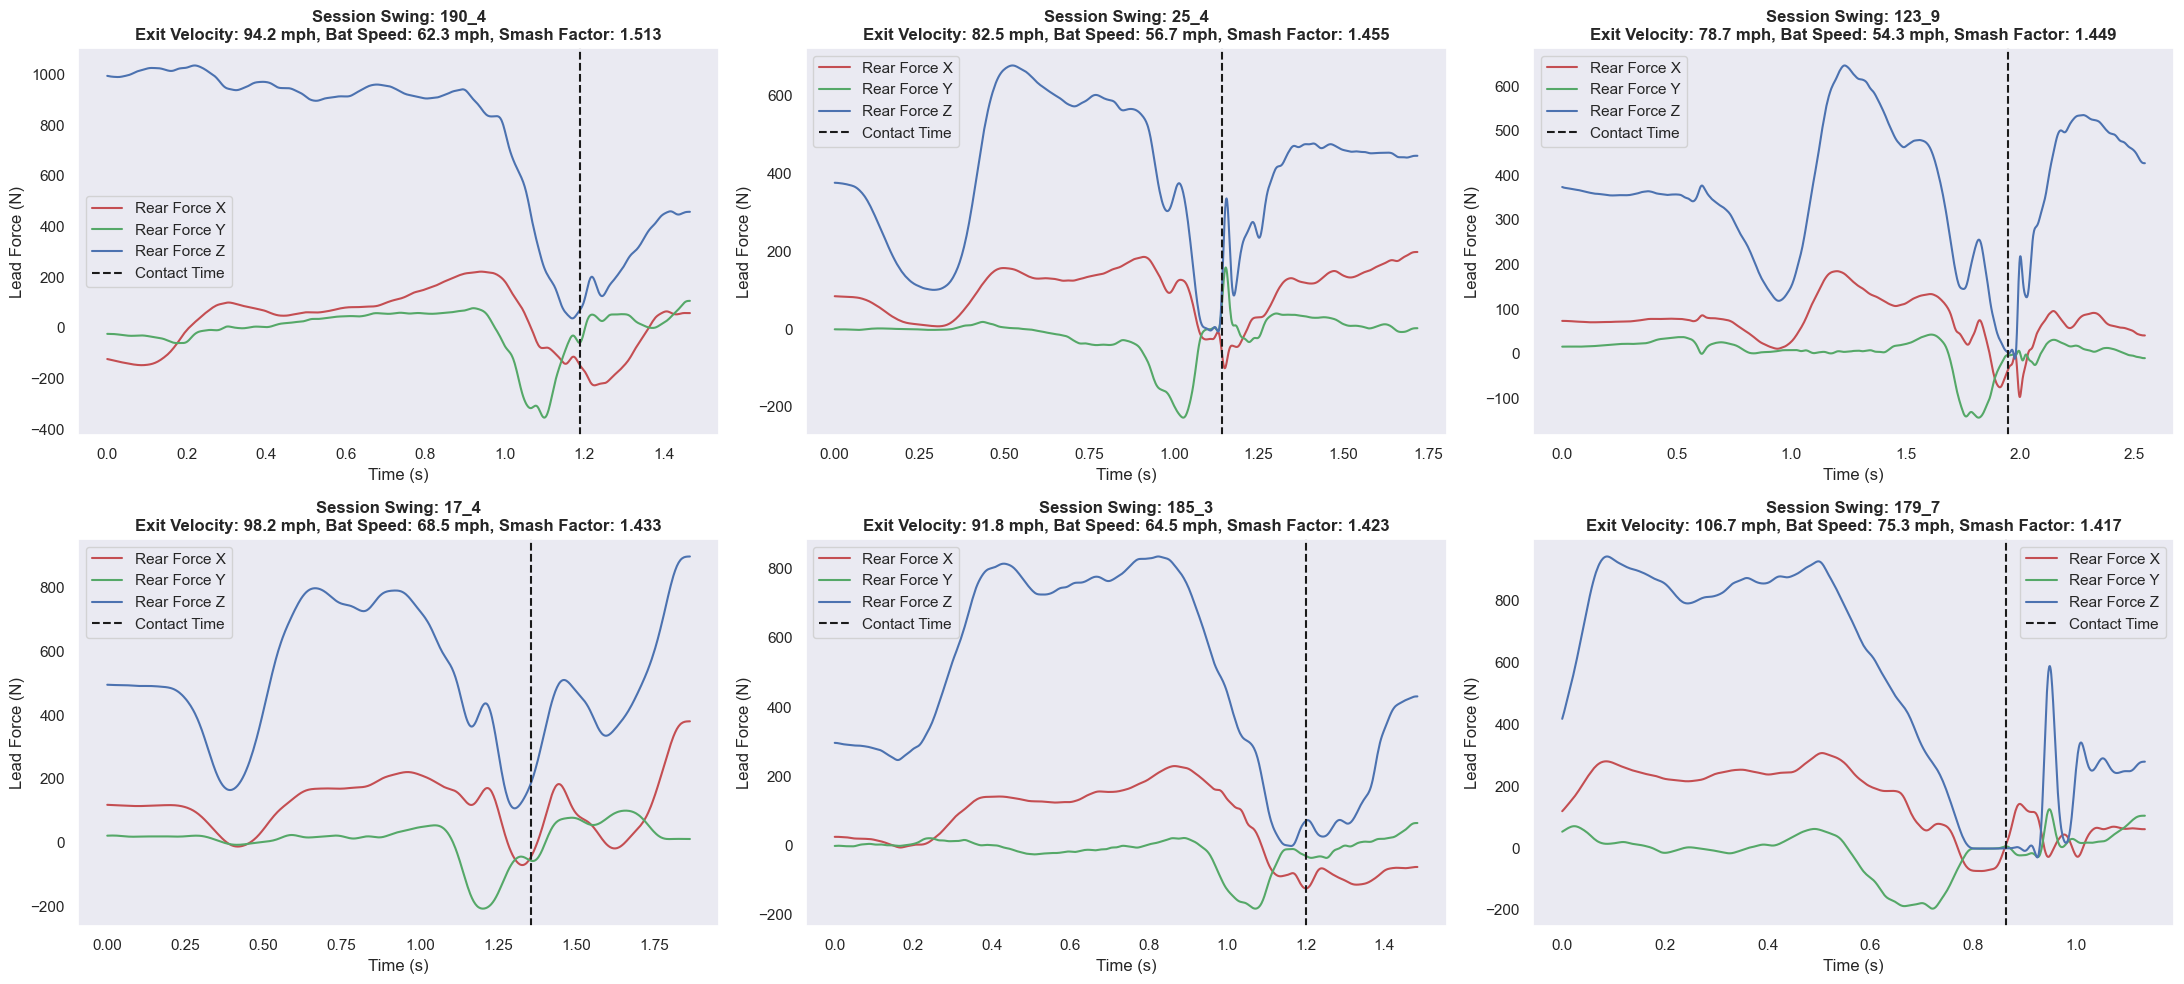

In [96]:

def plot_top_6_rear_forces(merged_fp_meta, top_6_smash):
    sns.set(style='darkgrid')
    
    fig, axs = plt.subplots(2, 3, figsize=(22, 10))
    
    axs = axs.flatten()
    
    for i, session_swing_id in enumerate(top_6_smash):
        session_data = merged_fp_meta_c[merged_fp_meta_c['session_swing'] == session_swing_id]
        
        exit_velocity = session_data['exit_velo_mph_x'].iloc[0]
        bat_speed = round(session_data['bat_speed_mph_contact_x'].iloc[0],1)
        smash_factor = session_data['smash_factor'].iloc[0]


        axs[i].plot(session_data['time'], session_data['rear_force_x'], color='r', label='Rear Force X')
        axs[i].plot(session_data['time'], session_data['rear_force_y'], color='g', label='Rear Force Y')
        axs[i].plot(session_data['time'], session_data['rear_force_z'], color='b', label='Rear Force Z')
        contact_time = session_data['contact_time'].iloc[0]
        axs[i].axvline(x=contact_time, color='k', linestyle='--', label='Contact Time')
        
        title = (f'Session Swing: {session_swing_id}\n'
                 f'Exit Velocity: {exit_velocity} mph, '
                 f'Bat Speed: {bat_speed} mph, '
                 f'Smash Factor: {smash_factor:.3f}')
                
        axs[i].set_title(title, fontweight='bold')
        axs[i].set_xlabel('Time (s)')
        axs[i].set_ylabel('Lead Force (N)')
        axs[i].legend()

    for ax in axs:
        ax.grid(False)  
    plt.tight_layout()
    plt.show()

plot_top_6_rear_forces(merged_fp_meta, top_6_smash)


### Plotting lead leg forces for top 6 ev swings

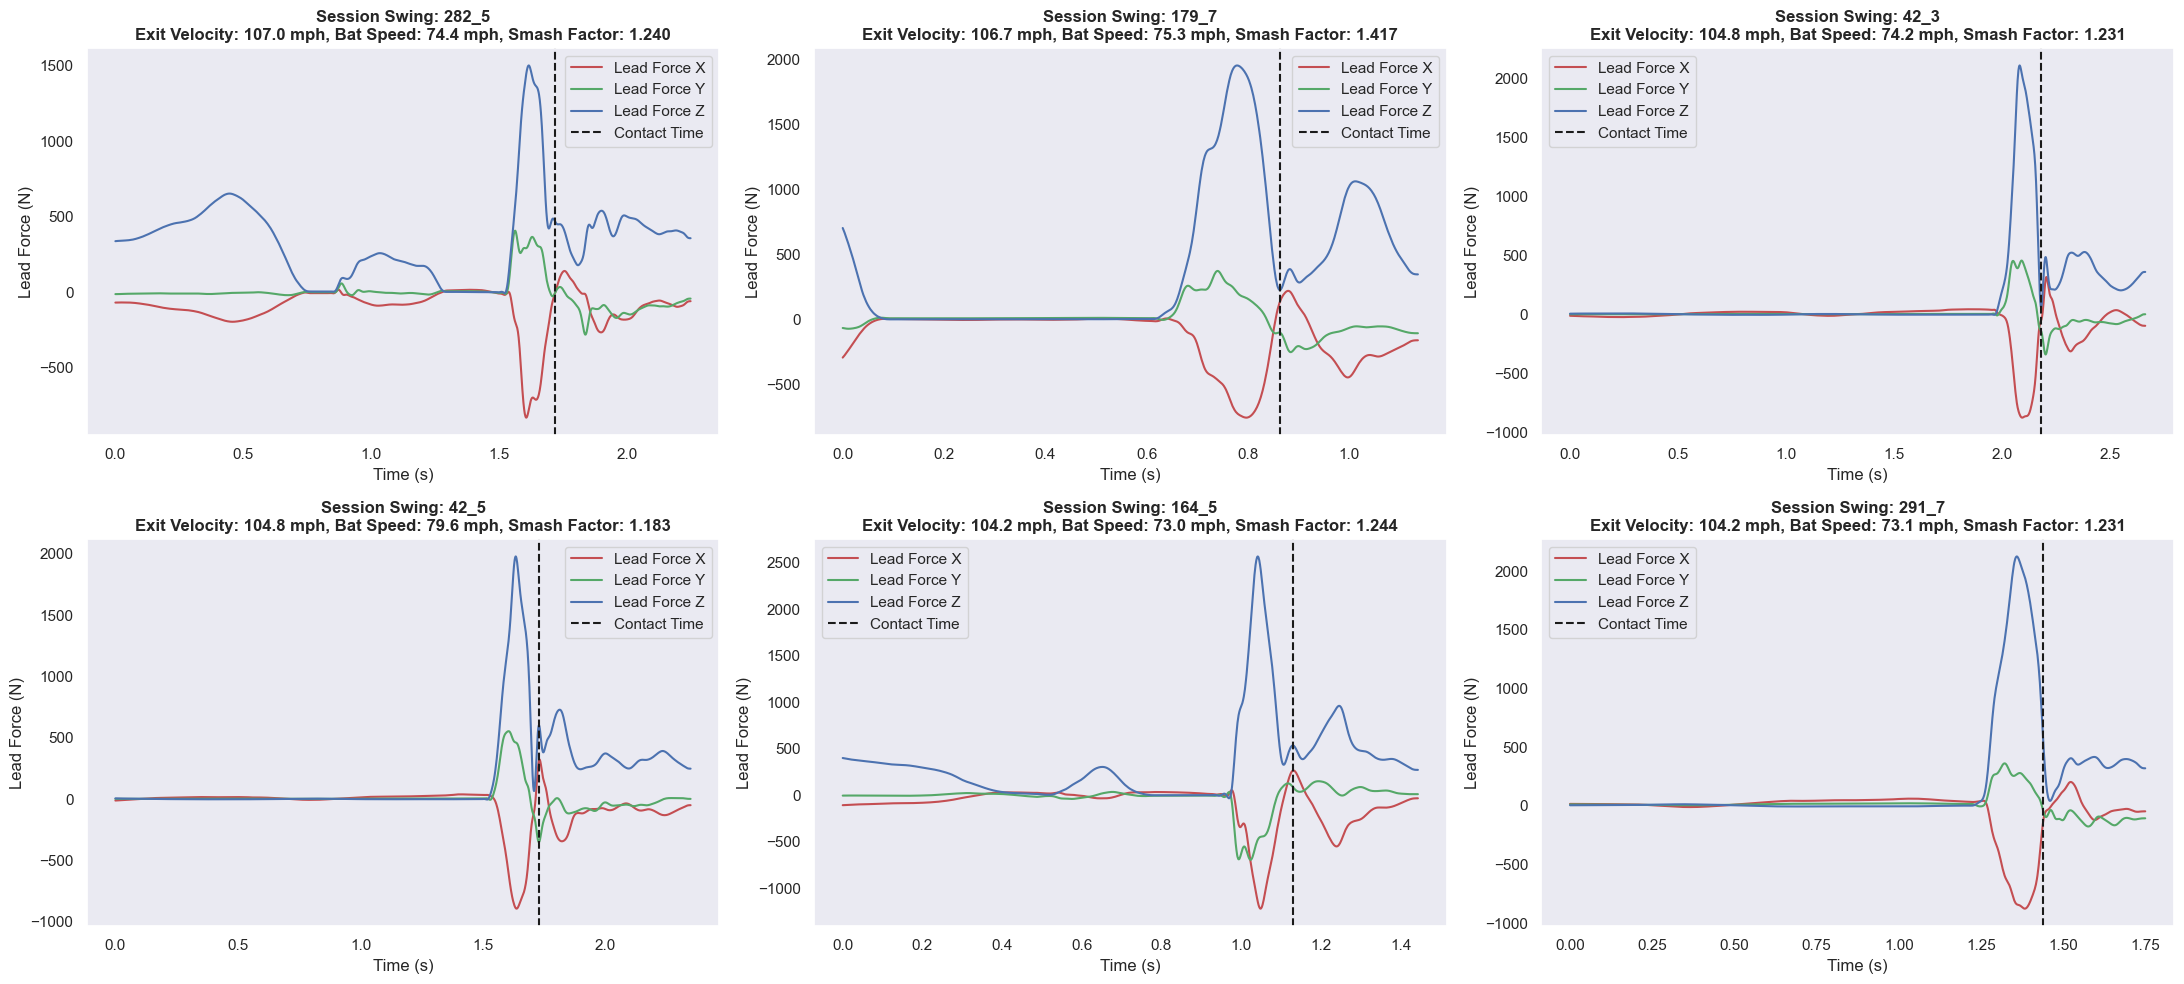

In [99]:
def plot_top_6_lead_forces(merged_fp_meta, top_6_ev):
    sns.set(style='darkgrid')
    
    fig, axs = plt.subplots(2, 3, figsize=(22, 10))
    
    axs = axs.flatten()
    
    for i, session_swing_id in enumerate(top_6_ev):
        session_data = merged_fp_meta_c[merged_fp_meta_c['session_swing'] == session_swing_id]
        
        exit_velocity = session_data['exit_velo_mph_x'].iloc[0]
        bat_speed = round(session_data['bat_speed_mph_contact_x'].iloc[0],1)
        smash_factor = session_data['smash_factor'].iloc[0]


        axs[i].plot(session_data['time'], session_data['lead_force_x'], color='r', label='Lead Force X')
        axs[i].plot(session_data['time'], session_data['lead_force_y'], color='g', label='Lead Force Y')
        axs[i].plot(session_data['time'], session_data['lead_force_z'], color='b', label='Lead Force Z')
        contact_time = session_data['contact_time'].iloc[0]
        axs[i].axvline(x=contact_time, color='k', linestyle='--', label='Contact Time')
        
        title = (f'Session Swing: {session_swing_id}\n'
                 f'Exit Velocity: {exit_velocity} mph, '
                 f'Bat Speed: {bat_speed} mph, '
                 f'Smash Factor: {smash_factor:.3f}')
                
        axs[i].set_title(title, fontweight='bold')
        axs[i].set_xlabel('Time (s)')
        axs[i].set_ylabel('Lead Force (N)')
        axs[i].legend()

    for ax in axs:
        ax.grid(False)  
    plt.tight_layout()
    plt.show()

plot_top_6_lead_forces(merged_fp_meta, top_6_ev)

### Plotting lead leg forces for top 6 bat speed swings

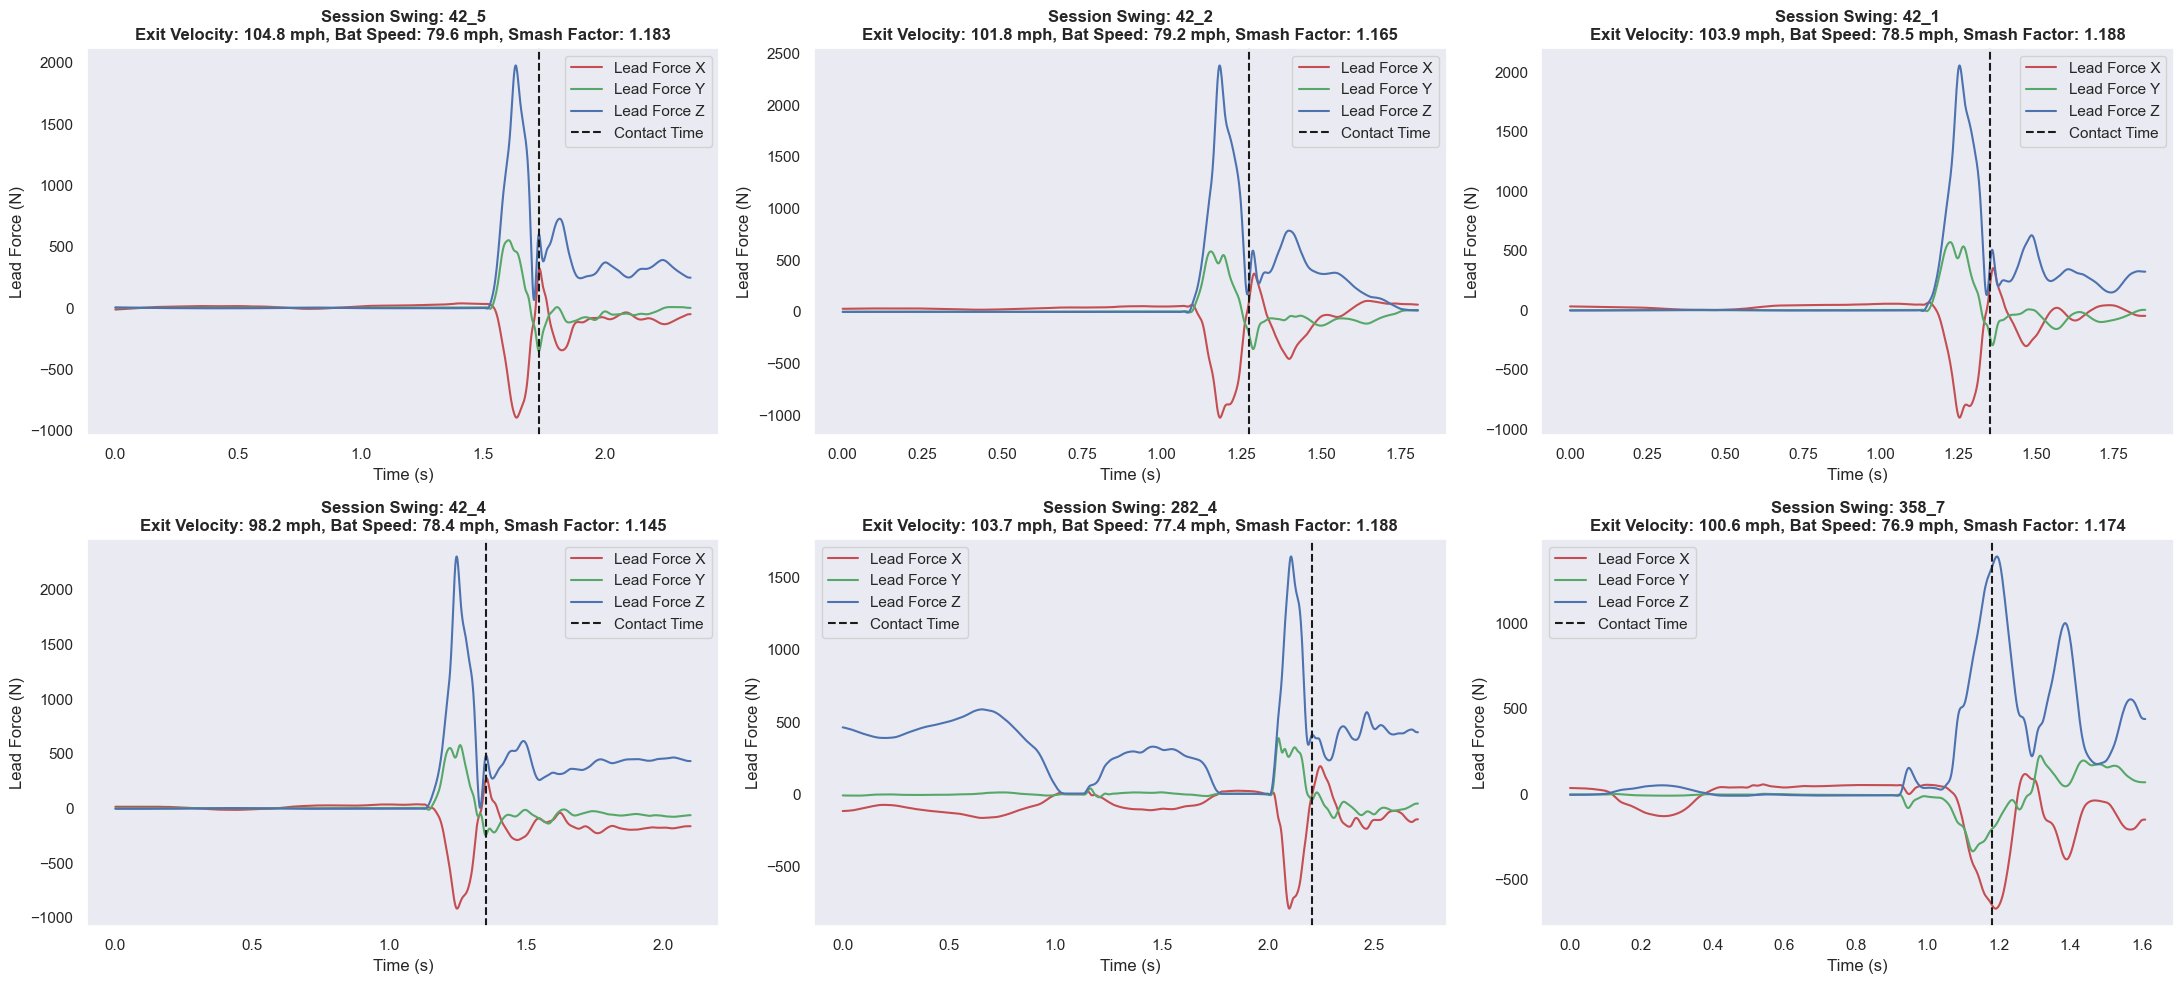

In [100]:

def plot_top_6_lead_forces(merged_fp_meta, top_6_bs):
    sns.set(style='darkgrid')
    
    fig, axs = plt.subplots(2, 3, figsize=(22, 10))
    
    axs = axs.flatten()
    
    for i, session_swing_id in enumerate(top_6_bs):
        session_data = merged_fp_meta_c[merged_fp_meta_c['session_swing'] == session_swing_id]
        
        exit_velocity = session_data['exit_velo_mph_x'].iloc[0]
        bat_speed = round(session_data['bat_speed_mph_contact_x'].iloc[0],1)
        smash_factor = session_data['smash_factor'].iloc[0]


        axs[i].plot(session_data['time'], session_data['lead_force_x'], color='r', label='Lead Force X')
        axs[i].plot(session_data['time'], session_data['lead_force_y'], color='g', label='Lead Force Y')
        axs[i].plot(session_data['time'], session_data['lead_force_z'], color='b', label='Lead Force Z')
        contact_time = session_data['contact_time'].iloc[0]
        axs[i].axvline(x=contact_time, color='k', linestyle='--', label='Contact Time')
        
        title = (f'Session Swing: {session_swing_id}\n'
                 f'Exit Velocity: {exit_velocity} mph, '
                 f'Bat Speed: {bat_speed} mph, '
                 f'Smash Factor: {smash_factor:.3f}')
                
        axs[i].set_title(title, fontweight='bold')
        axs[i].set_xlabel('Time (s)')
        axs[i].set_ylabel('Lead Force (N)')
        axs[i].legend()

    for ax in axs:
        ax.grid(False)  
    plt.tight_layout()
    plt.show()

plot_top_6_lead_forces(merged_fp_meta, top_6_bs)